In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow 
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [333]:
df= pd.read_csv('Admission_Predict.csv')

'''
The parameters included are :

GRE Scores ( out of 340 )
TOEFL Scores ( out of 120 )
University Rating ( out of 5 )
Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
Undergraduate GPA ( out of 10 )
Research Experience ( either 0 or 1 )
Chance of Admit ( ranging from 0 to 1 )

'''

'\nThe parameters included are :\n\nGRE Scores ( out of 340 )\nTOEFL Scores ( out of 120 )\nUniversity Rating ( out of 5 )\nStatement of Purpose and Letter of Recommendation Strength ( out of 5 )\nUndergraduate GPA ( out of 10 )\nResearch Experience ( either 0 or 1 )\nChance of Admit ( ranging from 0 to 1 )\n\n'

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [335]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [336]:
df.drop(columns=['Serial No.'],inplace=True)

In [337]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [338]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [339]:
x=df.drop(columns=['Chance of Admit '])
y=df['Chance of Admit ']

In [340]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [341]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [342]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [343]:
scaler=MinMaxScaler()

In [344]:
x_trained_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [345]:
x_trained_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [346]:
x_test_scaled

array([[ 0.44      ,  0.39285714,  0.5       ,  0.625     ,  0.71428571,
         0.58088235,  0.        ],
       [ 0.2       ,  0.28571429,  0.5       ,  0.25      ,  0.42857143,
         0.53676471,  1.        ],
       [ 0.68      ,  0.71428571,  0.75      ,  0.75      ,  0.57142857,
         0.57720588,  1.        ],
       [ 0.68      ,  0.53571429,  1.        ,  0.625     ,  0.71428571,
         0.53676471,  1.        ],
       [ 0.64      ,  0.64285714,  0.75      ,  0.75      ,  1.        ,
         0.70955882,  1.        ],
       [ 0.36      ,  0.5       ,  0.5       ,  0.5       ,  0.42857143,
         0.38235294,  0.        ],
       [ 0.4       ,  0.5       ,  0.25      ,  0.625     ,  0.28571429,
         0.41544118,  0.        ],
       [ 0.2       ,  0.35714286,  0.25      ,  0.125     ,  0.14285714,
         0.24632353,  0.        ],
       [ 0.4       ,  0.25      ,  0.25      ,  0.125     ,  0.14285714,
         0.03676471,  0.        ],
       [ 1.        ,  0.7142

In [347]:
model=Sequential()

In [348]:
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='linear'))
model.add(Dense(1,activation='linear'))

In [349]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 7)                 56        
                                                                 
 dense_57 (Dense)            (None, 7)                 56        
                                                                 
 dense_58 (Dense)            (None, 7)                 56        
                                                                 
 dense_59 (Dense)            (None, 1)                 8         
                                                                 
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [350]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [351]:
history = model.fit(x_trained_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 53ms/step - loss: 1.2554 - mae: 1.0818 - val_loss: 1.1670 - val_mae: 1.0479
Epoch 2/100
8/8 [==============================] - 0s 13ms/step - loss: 0.9130 - mae: 0.9219 - val_loss: 0.8306 - val_mae: 0.8834
Epoch 3/100
8/8 [==============================] - 0s 13ms/step - loss: 0.6311 - mae: 0.7651 - val_loss: 0.5551 - val_mae: 0.7205
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 0.4062 - mae: 0.6104 - val_loss: 0.3444 - val_mae: 0.5636
Epoch 5/100
8/8 [==============================] - 0s 12ms/step - loss: 0.2437 - mae: 0.4657 - val_loss: 0.1951 - val_mae: 0.4161
Epoch 6/100
8/8 [==============================] - 0s 18ms/step - loss: 0.1324 - mae: 0.3338 - val_loss: 0.1015 - val_mae: 0.2845
Epoch 7/100
8/8 [==============================] - 0s 16ms/step - loss: 0.0679 - mae: 0.2235 - val_loss: 0.0520 - val_mae: 0.1830
Epoch 8/100
8/8 [==============================] - 0s 20ms/step - loss: 0.0369 - mae: 0.15

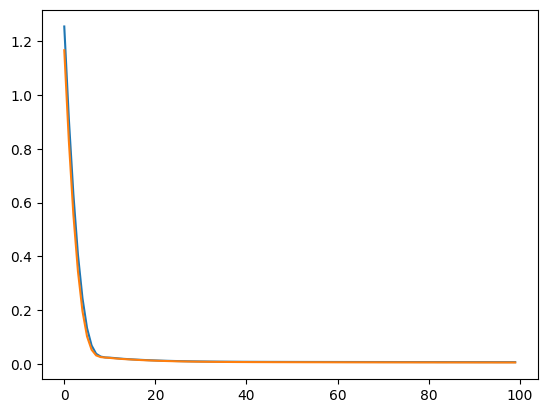

In [352]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

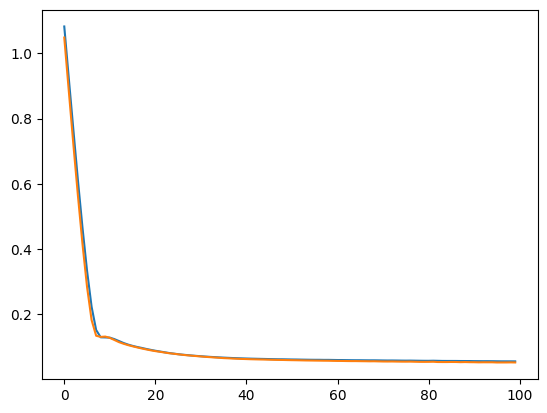

In [353]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

In [354]:
y_pred = model.predict(x_test_scaled)

3/3 [==============================] - 0s 8ms/step


In [355]:
y_pred

array([[0.6992937 ],
       [0.58276427],
       [0.8073251 ],
       [0.8253923 ],
       [0.86669517],
       [0.64938825],
       [0.6078878 ],
       [0.5165063 ],
       [0.5401087 ],
       [0.910298  ],
       [0.81735903],
       [0.8994665 ],
       [0.8623717 ],
       [0.63264835],
       [0.77547497],
       [0.65817213],
       [0.7368658 ],
       [0.83251095],
       [0.58165866],
       [0.6936531 ],
       [0.6282987 ],
       [0.768058  ],
       [0.82551444],
       [0.93119425],
       [0.7257833 ],
       [0.574824  ],
       [0.78778106],
       [0.6994342 ],
       [0.84665924],
       [0.7245141 ],
       [0.9783099 ],
       [0.61931676],
       [0.8166346 ],
       [0.7345663 ],
       [0.78404176],
       [0.6575092 ],
       [0.6279393 ],
       [0.6864405 ],
       [0.9022061 ],
       [0.6677479 ],
       [0.87661594],
       [0.66976273],
       [0.93222237],
       [0.63665336],
       [0.9646478 ],
       [0.7296448 ],
       [0.7793034 ],
       [0.833

In [356]:
from sklearn.metrics import r2_score

In [357]:
r2_score(y_test,y_pred)

0.7132102073158093